In [ ]:
import pandas as pd
import numpy as np
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import train_test_split
from mamsi.mamsi_pls import MamsiPls
from mamsi.mamsi_struct_search import MamsiStructSearch
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA

In [ ]:
HDF = pd.read_csv('C:\\Users\\hxr\\Desktop\\Permutation test\\HDF.csv', sep=',', index_col=0)
BM = pd.read_csv('C:\\Users\\hxr\\Desktop\\Permutation test\\BM.csv', sep=',', index_col=0)
LD = pd.read_csv('C:\\Users\\hxr\\Desktop\\Permutation test\\LD.csv', sep=',', index_col=0)
PM = pd.read_csv('C:\\Users\\hxr\\Desktop\\Permutation test\\PM.csv', sep=',', index_col=0)
Y=pd.read_csv('C:\\Users\\hxr\\Desktop\\Permutation test\\Y.csv', sep=',', index_col=0)

In [4]:
combined_data=pd.concat([HDF,BM,LD,PM],axis=1)

In [15]:
labels = ['HDF'] * 904 + ['BM'] *161  + ['LD'] * 1149 + ['PM'] * 501
pca = PCA(n_components=2)  # 降维到2个主成分
pca_result = pca.fit_transform(combined_data)
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
pca_df['Label'] = labels
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
pca_df['Label'] = labels

# 可视化PCA结果
plt.figure(figsize=(10, 8))
for label in np.unique(labels):
    subset = pca_df[pca_df['Label'] == label]
    plt.scatter(subset['PC1'], subset['PC2'], label=label, alpha=0.7)

# 添加图例和标签
plt.title('PCA of Metabolomics Data (Four Data Blocks)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title="Data Block")
plt.grid(True)
plt.show()

ValueError: Length of values (2715) does not match length of index (283)

Scores for model with n_components = 1

Accuracy 0.667
Precision 0.593
Recall 0.667
Specificity 0.667
F1 Score 0.627
AUC 0.742


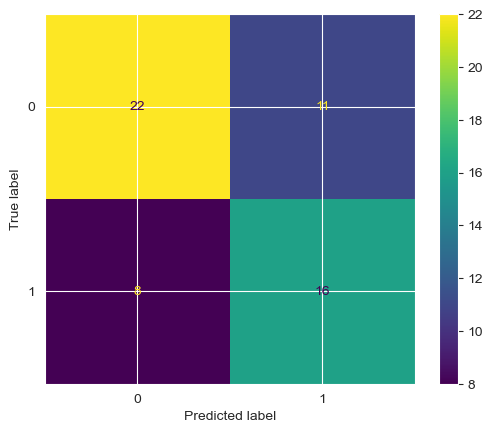

In [5]:
Data_train, Data_test, Y_train, Y_test = train_test_split(combined_data, Y, test_size=0.2, random_state=42)
#fit model
mamsipls = MamsiPls(n_components=1)
mamsipls.fit(Data_train, Y_train)
# predict
y_pred = mamsipls.evaluate_class_model(Data_test, Y_test)

auc reaches bent (increase of less than 5.0 % of previous value or decrease) at component 2
auc reaches plateau at component 3
Model re-fitted with n_components = 3


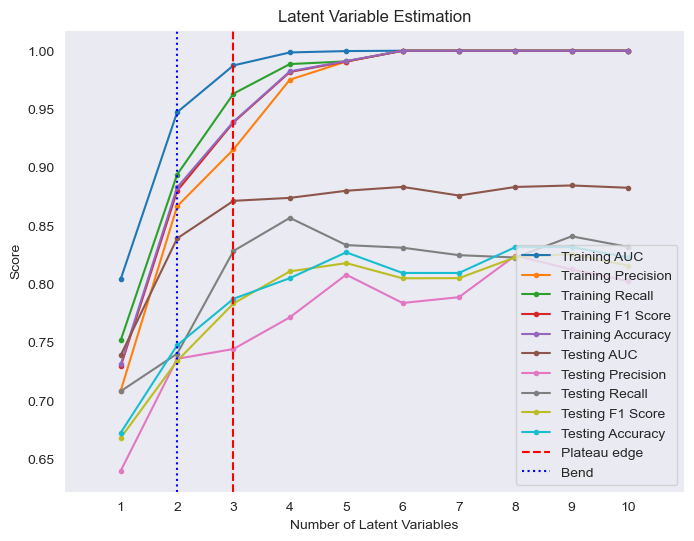

In [6]:
mamsipls.estimate_lv(Data_train, Y_train, metric="auc")

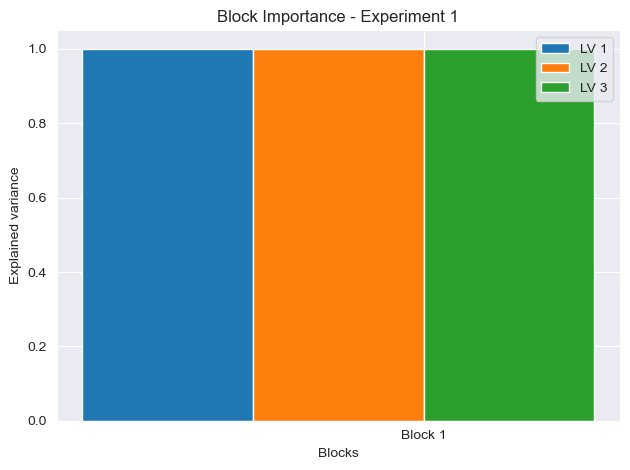

In [7]:
mamsipls.block_importance()

Scores for model with n_components = 3

Accuracy 0.86
Precision 0.9
Recall 0.75
Specificity 0.939
F1 Score 0.818
AUC 0.941


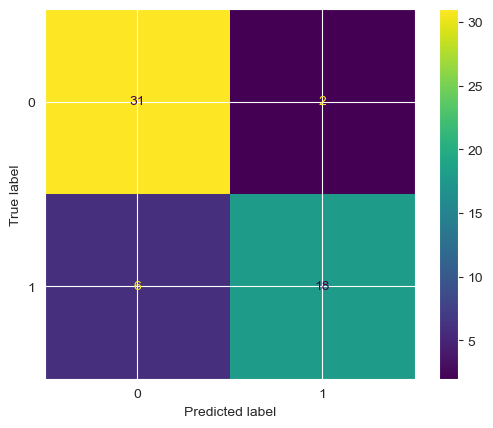

In [17]:
mamsipls = MamsiPls(n_components=3)
mamsipls.fit(Data_train, Y_train)
# predict
y_pred = mamsipls.evaluate_class_model(Data_test, Y_test)

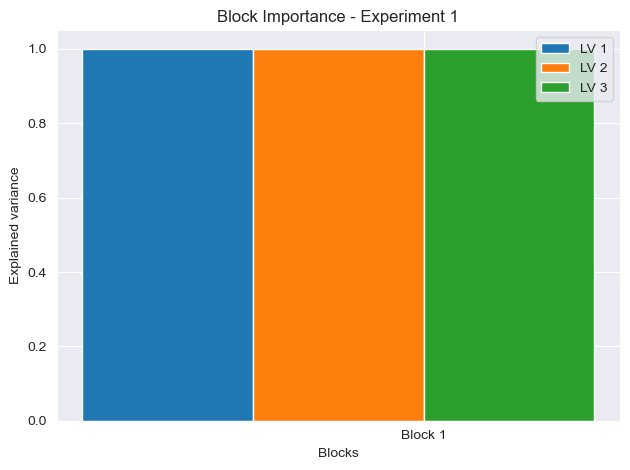

In [18]:
mamsipls.block_importance()

In [5]:
BM.head()

,C0 [p150],C10 [p150],C10.1 [p150],C10.2 [p150],C12 [p150],C12.DC [p150],C12.1 [p150],C14 [p150],C14.1 [p150],C14.1.OH [p150],...,SM.C16.0 [p150],SM.C16.1 [p150],SM.C18.0 [p150],SM.C18.1 [p150],SM.C20.2 [p150],SM.C24.0 [p150],SM.C24.1 [p150],SM.C26.0 [p150],SM.C26.1 [p150],H1 [p150]
1,-1.332547,-1.439302,-1.284074,-0.867231,-1.395818,0.752337,-1.429283,-2.097569,-1.686563,-1.273193,...,-2.189873,-2.310840,-1.983404,-1.881966,-2.226137,-1.031914,-2.012774,-1.283676,-1.194225,-1.529513
4,0.438130,1.718904,2.605664,2.742608,0.810959,0.640970,1.133056,-0.046040,1.408249,0.772634,...,0.971278,0.718548,-0.186673,0.045935,0.904767,-0.451507,1.258852,-0.137629,0.576479,-0.442723
6,1.287683,-0.202228,0.408967,1.038002,-0.016070,-0.785813,0.658672,0.258983,0.232135,1.427926,...,1.175321,1.670802,0.927654,0.994687,1.390594,1.538849,1.472688,0.195988,0.594043,-0.604691
7,0.585537,-0.258155,-0.279933,-0.007452,0.000783,-1.243259,-0.489207,0.508012,-0.084340,-0.586512,...,0.880754,0.236381,0.384300,-0.563600,-0.159423,1.171308,0.696063,0.536784,-0.306105,2.247111
8,0.825656,-0.282221,0.225182,-0.128732,-0.507445,-0.239713,-0.294334,-0.130278,0.141042,-0.758187,...,0.911143,1.762337,0.426913,1.033865,2.699352,0.576041,0.986919,1.315353,1.084618,0.410682


Scores for model with n_components = 1

Accuracy 0.719
Precision 0.667
Recall 0.667
Specificity 0.758
F1 Score 0.667
AUC 0.835


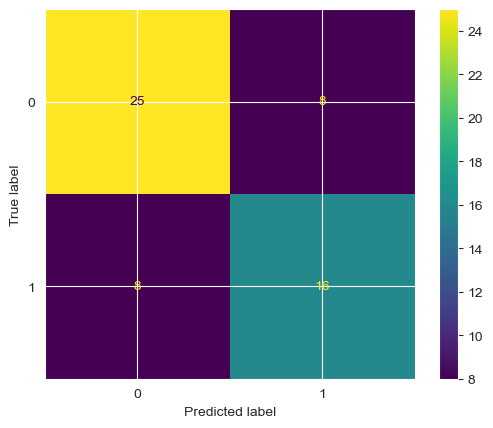

In [6]:
#(PM-HDF)-Y PLS(PM perform the best in single block)
#split data
HDF_train, HDF_test, Y_train, Y_test = train_test_split(HDF, Y, test_size=0.2, random_state=42)
PM_train = PM.loc[HDF_train.index]
PM_test = PM.loc[HDF_test.index]
#fit model
mamsipls = MamsiPls(n_components=1)
mamsipls.fit([HDF_train, PM_train], Y_train)
# predict
y_pred = mamsipls.evaluate_class_model([HDF_test, PM_test], Y_test)

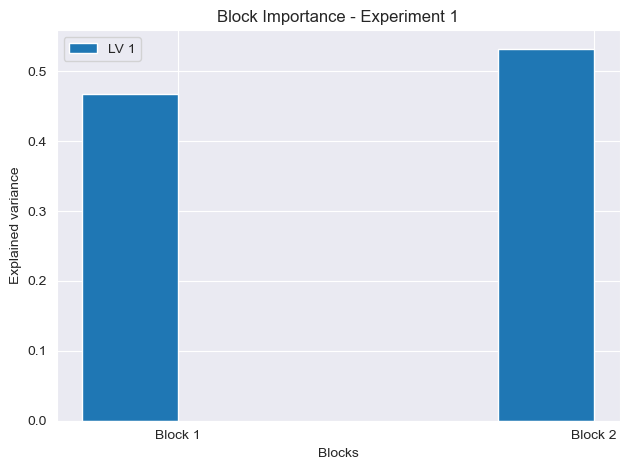

In [7]:
mamsipls.block_importance()

auc reaches bent (increase of less than 5.0 % of previous value or decrease) at component 1
auc reaches plateau at component 2
Model re-fitted with n_components = 2


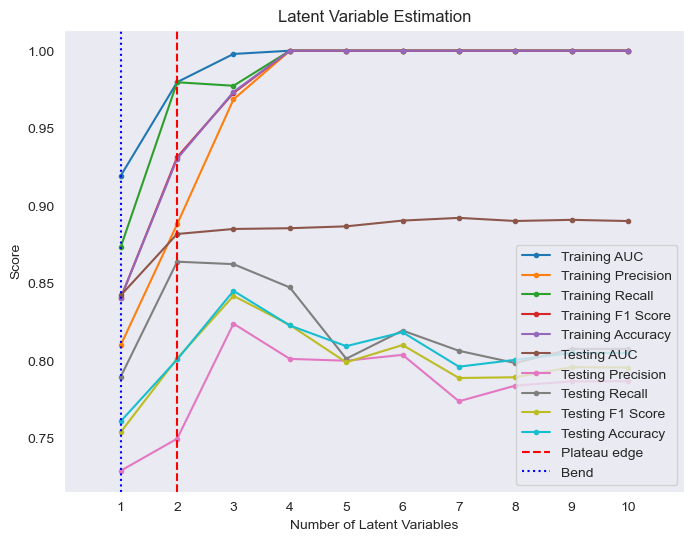

In [8]:
#estimate the number of components
mamsipls.estimate_lv([HDF_train, PM_train], Y_train, metric="auc")

Scores for model with n_components = 2

Accuracy 0.877
Precision 0.905
Recall 0.792
Specificity 0.939
F1 Score 0.844
AUC 0.943


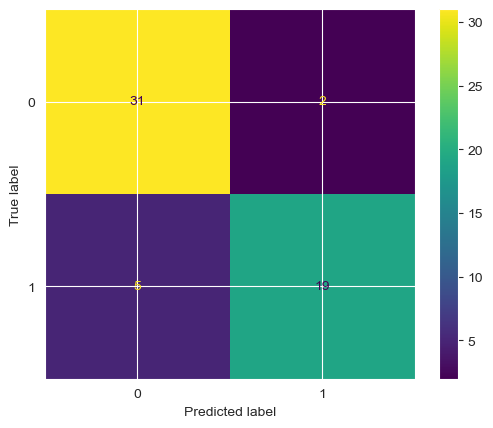

In [19]:
#fit model
mamsipls = MamsiPls(n_components=2)
mamsipls.fit([HDF_train, PM_train], Y_train)
# predict
y_pred = mamsipls.evaluate_class_model([HDF_test, PM_test], Y_test)

In [11]:
help(mamsipls)

Help on MamsiPls in module mamsi.mamsi_pls object:

class MamsiPls(mbpls.mbpls.MBPLS)
 |  MamsiPls(n_components=2, full_svd=False, method='NIPALS', standardize=True, max_tol=1e-14, nipals_convergence_norm=2, calc_all=True, sparse_data=False, copy=True)
 |  
 |  A class that extends the MB_PLS class by extra methods convenient in Chemometrics and Metabolomics research. 
 |  It is based on MB-PLS package: Baum et al., (2019). Multiblock PLS: Block dependent prediction modeling for Python.
 |  This wrapper has some extra methods convenient in Chemometrics and Metabolomics research.
 |  
 |  For a full list of methods, please refer to the MB-PLS class [documentation](https://mbpls.readthedocs.io/en/latest/index.html).
 |  
 |  Args:
 |      n_components (int, optional): A number of Latent Variables (LV). Defaults to 2.
 |      full_svd (bool, optional): Whether to use full singular value decomposition when performing the SVD method. 
 |          Set to False when using very large quadratic

In [22]:
block_scores=mamsipls.T_

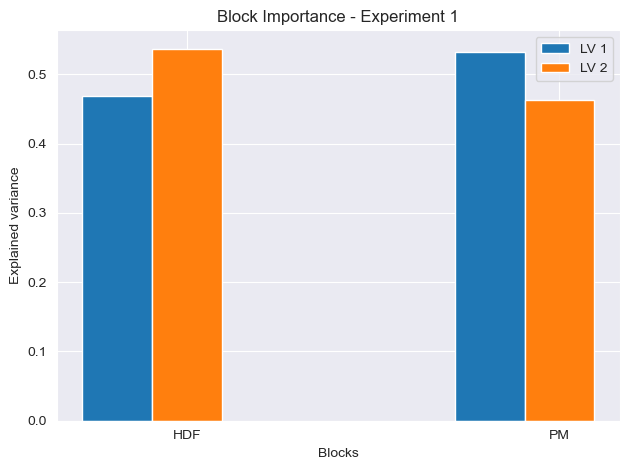

array([[0.46814606, 0.53646178],
       [0.53185394, 0.46353822]])

In [26]:
mamsipls.block_importance(block_labels=['HDF','PM'],get_scores=True)

In [29]:
block_names = ['HDF','PM']
scores_dict = {block_name: scores for block_name, scores in zip(block_names, block_scores)}

In [30]:
print(scores_dict)

{'HDF': array([[ -4.17776171,  -8.00448393],
       [ -4.80311583,  -5.63388047],
       [ -0.80210412,  -2.98754986],
       [  5.47879641,   2.5782328 ],
       [ -5.0486363 ,  -2.96667388],
       [  2.32284172,   5.78786616],
       [ -7.87180567,  -1.82989439],
       [ -9.32083357,  -2.02713992],
       [ -7.61139455,  -2.50249033],
       [  2.55831049,  -6.72170601],
       [-18.30734471,  -2.06969762],
       [  7.09937647,  10.72949088],
       [  5.60182487,  -3.300343  ],
       [-12.2737533 ,   2.66494031],
       [-10.56707878,  -0.88898909],
       [ 12.06720465,   4.46807477],
       [  1.97980877,  -8.64507146],
       [  4.82553926,  -8.51642297],
       [ -1.61954989,   3.61495314],
       [ -0.71273369,  -0.46486858],
       [ -0.37449096, -10.22498946],
       [ -0.51732755,  -4.403352  ],
       [ -1.68350622,  -3.39099066],
       [ -9.61445692,  -7.64420293],
       [ -6.82732147,  -0.45837882],
       [  3.56407694,   2.05409431],
       [ -4.47357185,  -6.8057

In [31]:
help(mamsipls.Ts_)

Help on ndarray object:

class ndarray(builtins.object)
 |  ndarray(shape, dtype=float, buffer=None, offset=0,
 |          strides=None, order=None)
 |  
 |  An array object represents a multidimensional, homogeneous array
 |  of fixed-size items.  An associated data-type object describes the
 |  format of each element in the array (its byte-order, how many bytes it
 |  occupies in memory, whether it is an integer, a floating point number,
 |  or something else, etc.)
 |  
 |  Arrays should be constructed using `array`, `zeros` or `empty` (refer
 |  to the See Also section below).  The parameters given here refer to
 |  a low-level method (`ndarray(...)`) for instantiating an array.
 |  
 |  For more information, refer to the `numpy` module and examine the
 |  methods and attributes of an array.
 |  
 |  Parameters
 |  ----------
 |  (for the __new__ method; see Notes below)
 |  
 |  shape : tuple of ints
 |      Shape of created array.
 |  dtype : data-type, optional
 |      Any objec

Scores for model with n_components = 1

Accuracy 0.649
Precision 0.571
Recall 0.667
Specificity 0.636
F1 Score 0.615
AUC 0.641


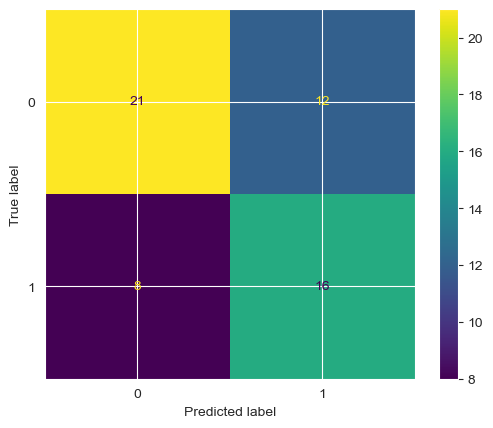

In [34]:
#(LD-BM)-Y PLS
#split data
LD_train, LD_test, Y_train, Y_test = train_test_split(LD, Y, test_size=0.2, random_state=42)
BM_train = BM.loc[LD_train.index]
BM_test = BM.loc[LD_test.index]
#fit model
mamsipls = MamsiPls(n_components=1)
mamsipls.fit([LD_train, BM_train], Y_train)
# predict
y_pred = mamsipls.evaluate_class_model([LD_test, BM_test], Y_test)

auc reaches bend (increase of less than 5.0 % of previous value or decrease) at component 3
No plateau detected, consider exploring more latent variables.
Model re-fitted with n_components = 3


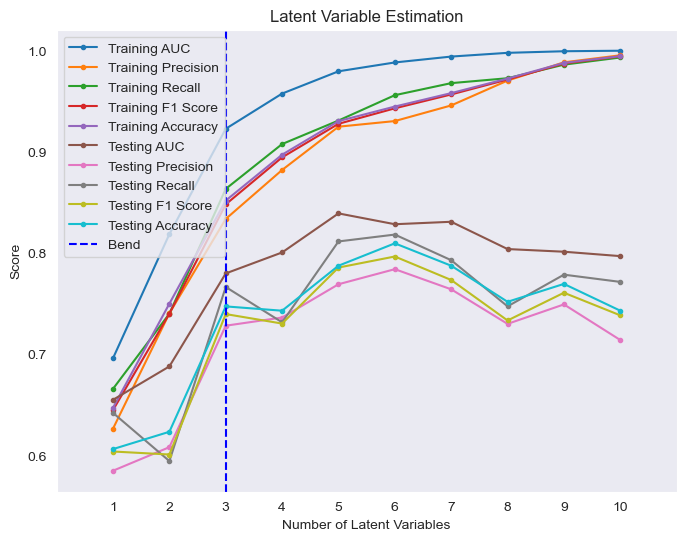

In [35]:
mamsipls.estimate_lv([LD_train, BM_train], Y_train, metric="auc")

Scores for model with n_components = 3

Accuracy 0.807
Precision 0.783
Recall 0.75
Specificity 0.848
F1 Score 0.766
AUC 0.847


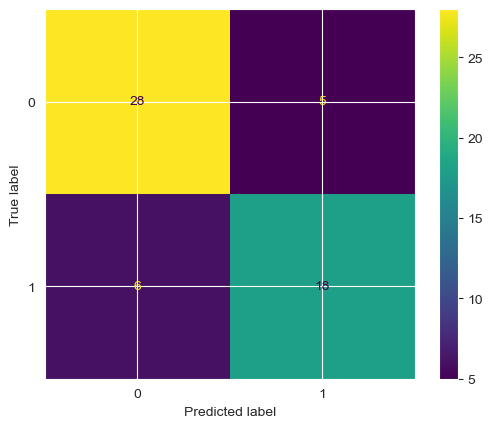

In [36]:
mamsipls = MamsiPls(n_components=3)
mamsipls.fit([LD_train, BM_train], Y_train)
y_pred = mamsipls.evaluate_class_model([LD_test, BM_test], Y_test)

Scores for model with n_components = 1

Accuracy 0.719
Precision 0.654
Recall 0.708
Specificity 0.727
F1 Score 0.68
AUC 0.854


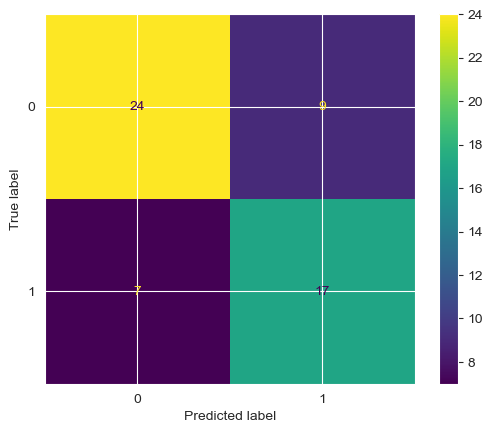

In [6]:
#(PM-BM)-Y PLS
#split data
PM_train, PM_test, Y_train, Y_test = train_test_split(PM, Y, test_size=0.2, random_state=42)
BM_train = BM.loc[PM_train.index]
BM_test = BM.loc[PM_test.index]
#fit model
mamsipls = MamsiPls(n_components=1)
mamsipls.fit([PM_train, BM_train], Y_train)
# predict
y_pred = mamsipls.evaluate_class_model([PM_test, BM_test], Y_test)

auc reaches bent (increase of less than 5.0 % of previous value or decrease) at component 1
auc reaches plateau at component 2
Model re-fitted with n_components = 2


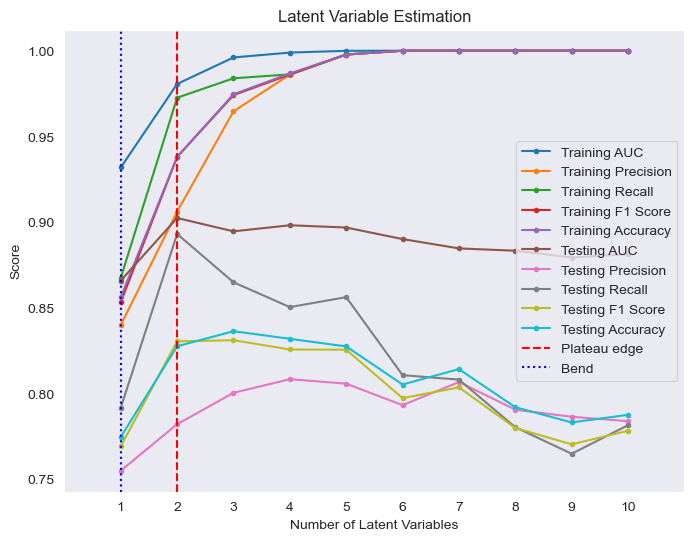

In [38]:
mamsipls.estimate_lv([PM_train, BM_train], Y_train, metric="auc")

Scores for model with n_components = 2

Accuracy 0.86
Precision 0.808
Recall 0.875
Specificity 0.848
F1 Score 0.84
AUC 0.929


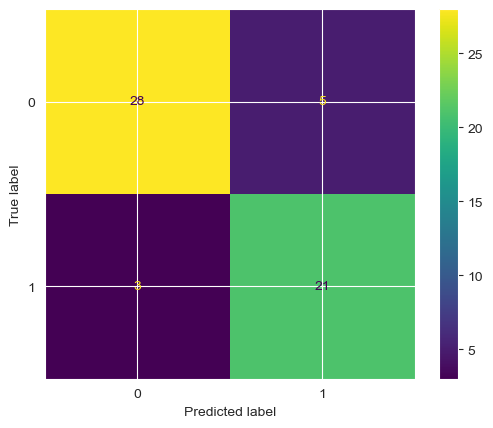

In [40]:
mamsipls = MamsiPls(n_components=2)
mamsipls.fit([PM_train, BM_train], Y_train)
y_pred = mamsipls.evaluate_class_model([PM_test, BM_test], Y_test)

Scores for model with n_components = 1

Accuracy 0.632
Precision 0.552
Recall 0.667
Specificity 0.606
F1 Score 0.604
AUC 0.664


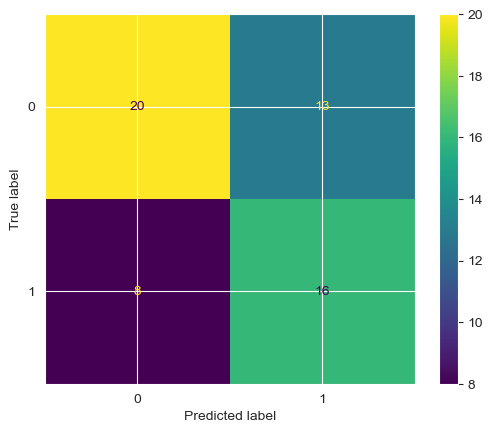

In [23]:
#(PM-LD)-Y PLS
#split data
PM_train, PM_test, Y_train, Y_test = train_test_split(PM, Y, test_size=0.2, random_state=42)
LD_train = LD.loc[PM_train.index]
LD_test = LD.loc[PM_test.index]
#fit model
mamsipls = MamsiPls(n_components=1)
mamsipls.fit([PM_train, LD_train], Y_train)
# predict
y_pred = mamsipls.evaluate_class_model([PM_test, LD_test], Y_test)

auc reaches bent (increase of less than 5.0 % of previous value or decrease) at component 3
auc reaches plateau at component 5
Model re-fitted with n_components = 5


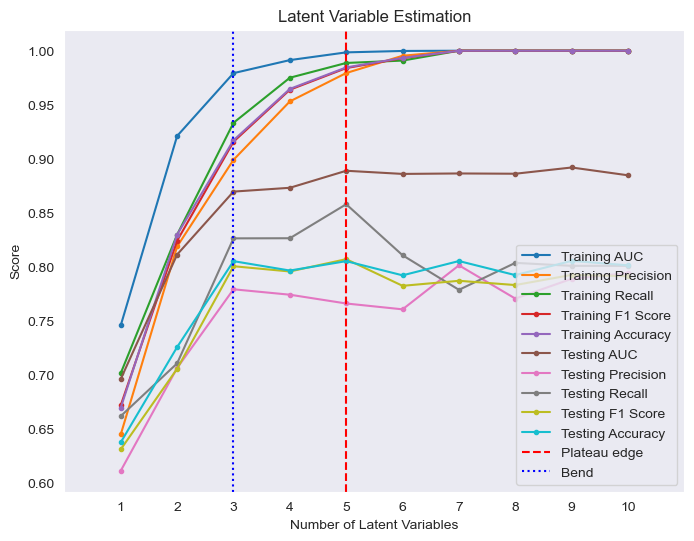

In [44]:
mamsipls.estimate_lv([PM_train, LD_train], Y_train, metric="auc")

Scores for model with n_components = 5

Accuracy 0.789
Precision 0.75
Recall 0.75
Specificity 0.818
F1 Score 0.75
AUC 0.828


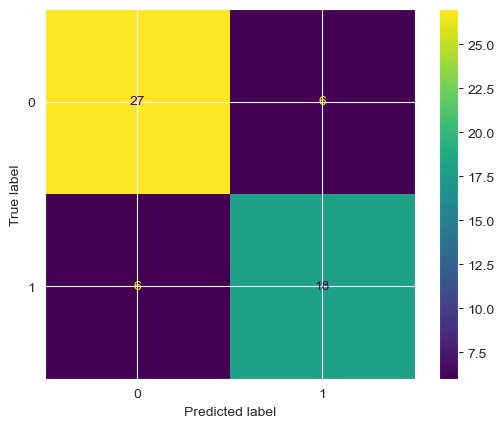

In [46]:
mamsipls = MamsiPls(n_components=5)
mamsipls.fit([PM_train, LD_train], Y_train)
# predict
y_pred = mamsipls.evaluate_class_model([PM_test, LD_test], Y_test)

Scores for model with n_components = 1

Accuracy 0.684
Precision 0.615
Recall 0.667
Specificity 0.697
F1 Score 0.64
AUC 0.698


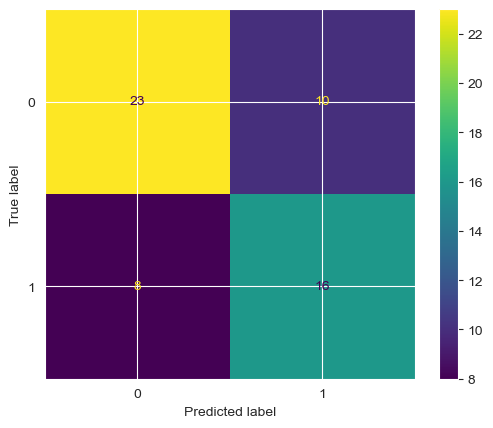

In [47]:
#(HDF-LD)-Y PLS
#split data
HDF_train, HDF_test, Y_train, Y_test = train_test_split(HDF, Y, test_size=0.2, random_state=42)
LD_train = LD.loc[HDF_train.index]
LD_test = LD.loc[HDF_test.index]
#fit model
mamsipls = MamsiPls(n_components=1)
mamsipls.fit([HDF_train, LD_train], Y_train)
# predict
y_pred = mamsipls.evaluate_class_model([HDF_test, LD_test], Y_test)

auc reaches bent (increase of less than 5.0 % of previous value or decrease) at component 3
auc reaches plateau at component 6
Model re-fitted with n_components = 6


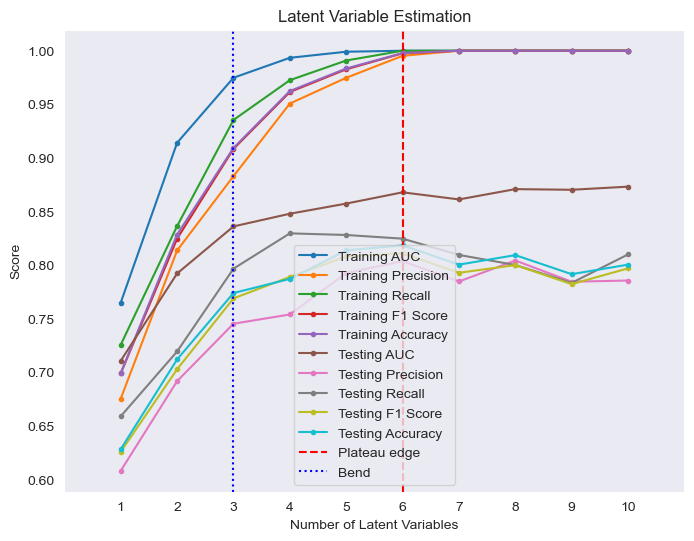

In [48]:
mamsipls.estimate_lv([HDF_train, LD_train], Y_train, metric="auc")

Scores for model with n_components = 6

Accuracy 0.789
Precision 0.773
Recall 0.708
Specificity 0.848
F1 Score 0.739
AUC 0.885


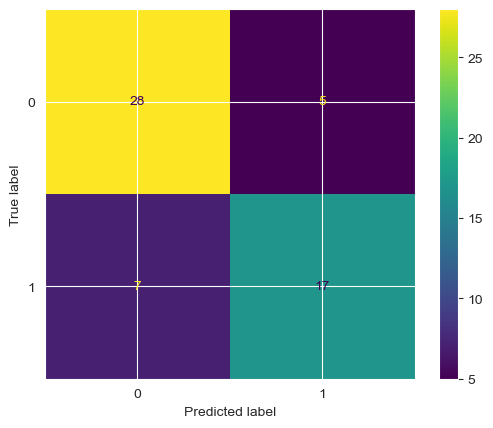

In [49]:
mamsipls = MamsiPls(n_components=6)
mamsipls.fit([HDF_train, LD_train], Y_train)
# predict
y_pred = mamsipls.evaluate_class_model([HDF_test, LD_test], Y_test)

Scores for model with n_components = 1

Accuracy 0.737
Precision 0.714
Recall 0.625
Specificity 0.818
F1 Score 0.667
AUC 0.841


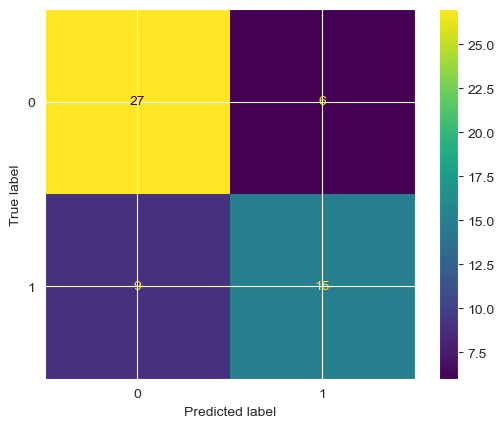

In [51]:
#(HDF-BM)-Y PLS
#split data
HDF_train, HDF_test, Y_train, Y_test = train_test_split(HDF, Y, test_size=0.2, random_state=42)
BM_train = BM.loc[HDF_train.index]
BM_test = BM.loc[HDF_test.index]
#fit model
mamsipls = MamsiPls(n_components=1)
mamsipls.fit([HDF_train, BM_train], Y_train)
# predict
y_pred = mamsipls.evaluate_class_model([HDF_test, BM_test], Y_test)

auc reaches bent (increase of less than 5.0 % of previous value or decrease) at component 1
auc reaches plateau at component 6
Model re-fitted with n_components = 6


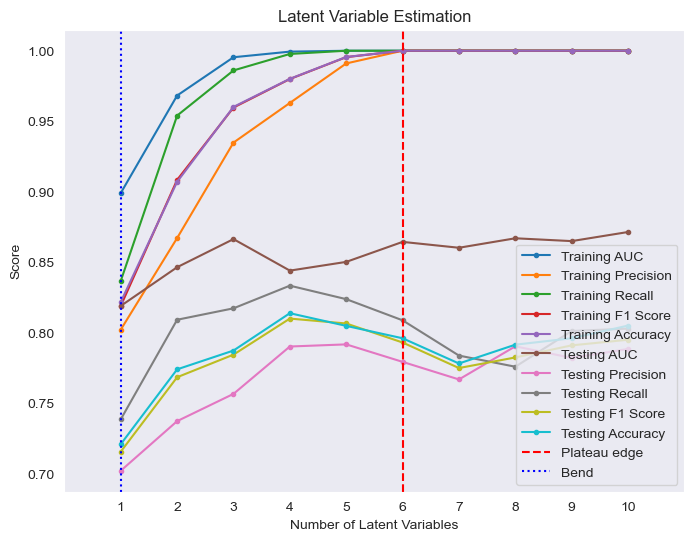

In [52]:
mamsipls.estimate_lv([HDF_train, BM_train], Y_train, metric="auc")

Scores for model with n_components = 6

Accuracy 0.825
Precision 0.818
Recall 0.75
Specificity 0.879
F1 Score 0.783
AUC 0.913


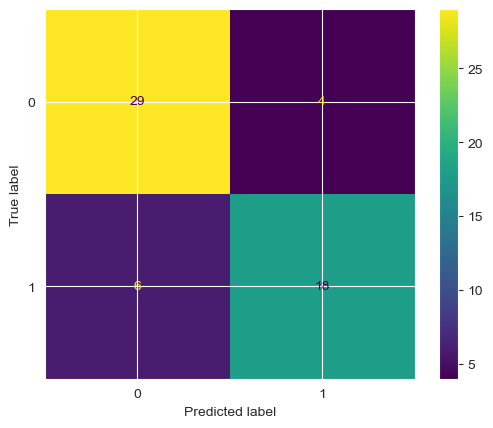

In [53]:
mamsipls = MamsiPls(n_components=6)
mamsipls.fit([HDF_train, BM_train], Y_train)
# predict
y_pred = mamsipls.evaluate_class_model([HDF_test, BM_test], Y_test)

# Three blocks

Scores for model with n_components = 1

Accuracy 0.737
Precision 0.714
Recall 0.625
Specificity 0.818
F1 Score 0.667
AUC 0.851


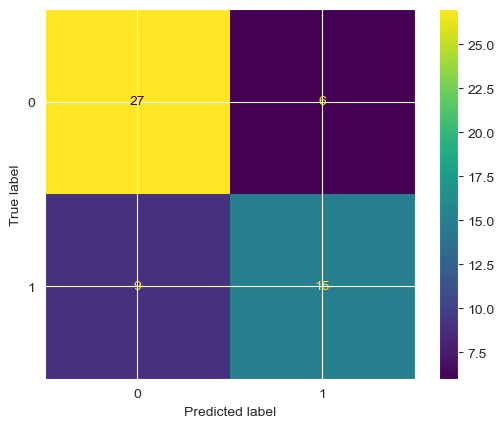

In [5]:
#(HDF-BM_PM)-Y PLS
#split data
HDF_train, HDF_test, Y_train, Y_test = train_test_split(HDF, Y, test_size=0.2, random_state=42)
BM_train = BM.loc[HDF_train.index]
BM_test = BM.loc[HDF_test.index]

LD_train = LD.loc[HDF_train.index]
LD_test = LD.loc[HDF_test.index]

PM_train = PM.loc[HDF_train.index]
PM_test = PM.loc[HDF_test.index]
#fit model
mamsipls = MamsiPls(n_components=1)
mamsipls.fit([HDF_train, BM_train, PM_train], Y_train)
# predict
y_pred = mamsipls.evaluate_class_model([HDF_test, BM_test,PM_test], Y_test)

auc reaches bent (increase of less than 5.0 % of previous value or decrease) at component 1
auc reaches plateau at component 2
Model re-fitted with n_components = 2


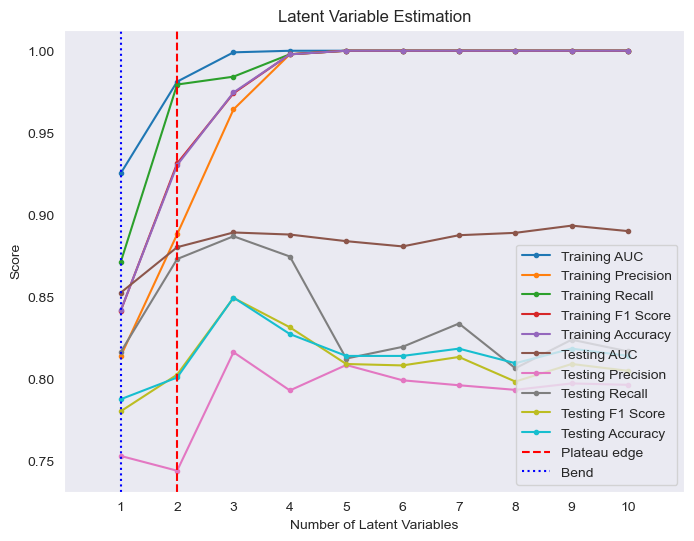

In [7]:
mamsipls.estimate_lv([HDF_train, BM_train,PM_train], Y_train, metric="auc")

In [8]:
print(mamsipls.n_components)

2


Scores for model with n_components = 2

Accuracy 0.877
Precision 0.905
Recall 0.792
Specificity 0.939
F1 Score 0.844
AUC 0.944


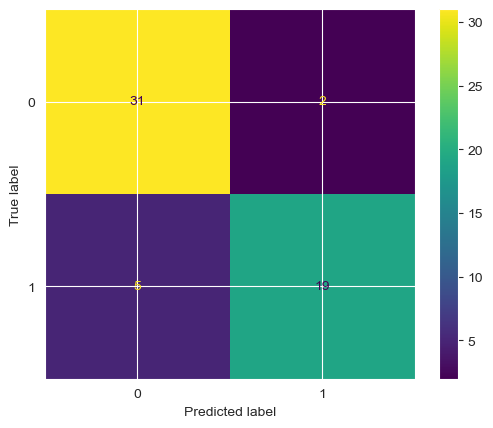

In [9]:
y_pred = mamsipls.evaluate_class_model([HDF_test, BM_test,PM_test], Y_test)

Scores for model with n_components = 1

Accuracy 0.684
Precision 0.615
Recall 0.667
Specificity 0.697
F1 Score 0.64
AUC 0.708


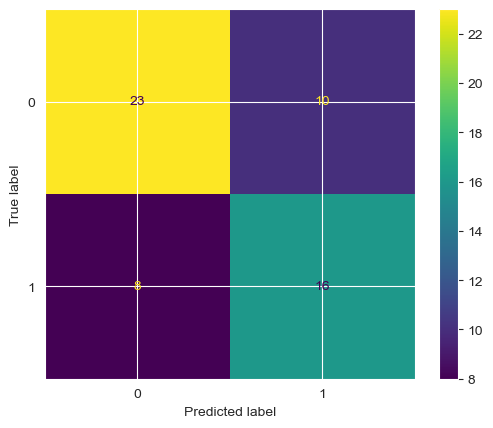

In [10]:
#(HDF-BM_LD)-Y PLS
mamsipls = MamsiPls(n_components=1)
mamsipls.fit([HDF_train, BM_train, LD_train], Y_train)
# predict
y_pred = mamsipls.evaluate_class_model([HDF_test, BM_test, LD_test], Y_test)

auc reaches bent (increase of less than 5.0 % of previous value or decrease) at component 3
auc reaches plateau at component 5
Model re-fitted with n_components = 5


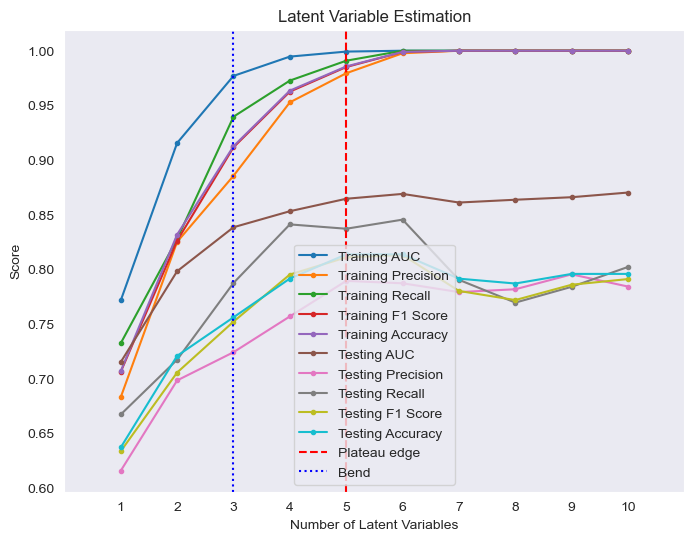

In [11]:
mamsipls.estimate_lv([HDF_train, BM_train,LD_train], Y_train, metric="auc")

In [12]:
print(mamsipls.n_components)

5


Scores for model with n_components = 5

Accuracy 0.807
Precision 0.783
Recall 0.75
Specificity 0.848
F1 Score 0.766
AUC 0.888


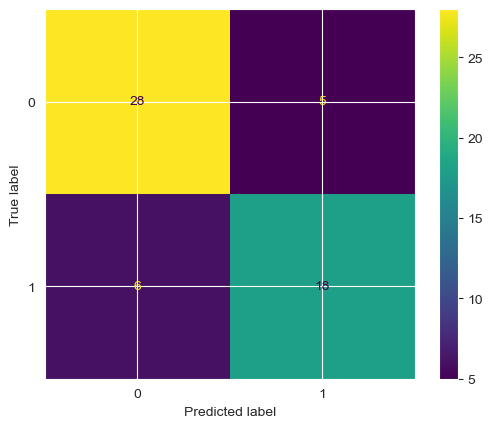

In [13]:
y_pred = mamsipls.evaluate_class_model([HDF_test, BM_test, LD_test], Y_test)

Scores for model with n_components = 1

Accuracy 0.649
Precision 0.571
Recall 0.667
Specificity 0.636
F1 Score 0.615
AUC 0.67


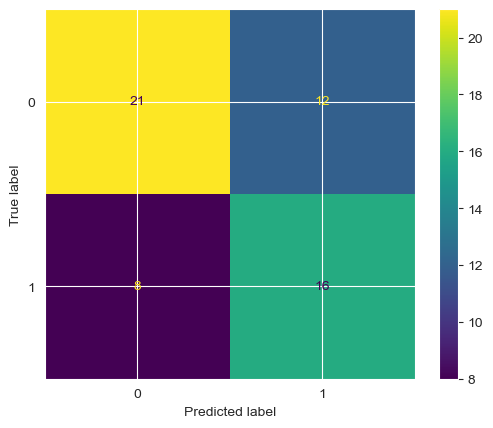

In [15]:
#(BM_PM_LD)-Y PLS
#split data
HDF_train, HDF_test, Y_train, Y_test = train_test_split(HDF, Y, test_size=0.2, random_state=42)
BM_train = BM.loc[HDF_train.index]
BM_test = BM.loc[HDF_test.index]

LD_train = LD.loc[HDF_train.index]
LD_test = LD.loc[HDF_test.index]

PM_train = PM.loc[HDF_train.index]
PM_test = PM.loc[HDF_test.index]

mamsipls = MamsiPls(n_components=1)
mamsipls.fit([BM_train, PM_train, LD_train], Y_train)
# predict
y_pred = mamsipls.evaluate_class_model([BM_test, PM_test, LD_test], Y_test)

auc reaches bent (increase of less than 5.0 % of previous value or decrease) at component 3
auc reaches plateau at component 6
Model re-fitted with n_components = 6


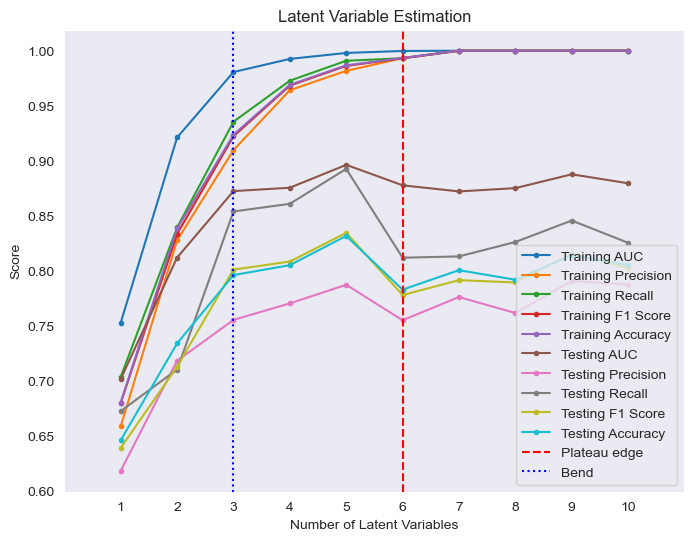

In [16]:
mamsipls.estimate_lv([BM_train, PM_train,LD_train], Y_train, metric="auc")

In [17]:
print(mamsipls.n_components)

6


Scores for model with n_components = 6

Accuracy 0.772
Precision 0.72
Recall 0.75
Specificity 0.788
F1 Score 0.735
AUC 0.869


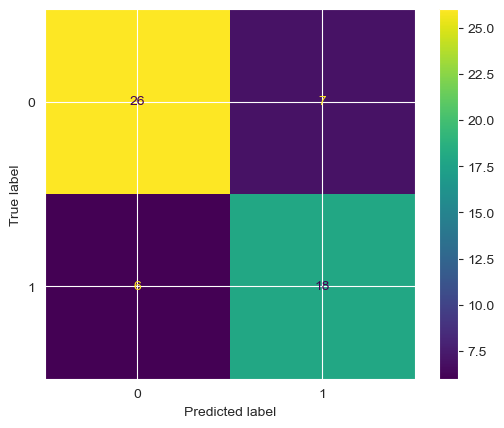

In [18]:
y_pred = mamsipls.evaluate_class_model([BM_test, PM_test, LD_test], Y_test)

Scores for model with n_components = 1

Accuracy 0.667
Precision 0.593
Recall 0.667
Specificity 0.667
F1 Score 0.627
AUC 0.731


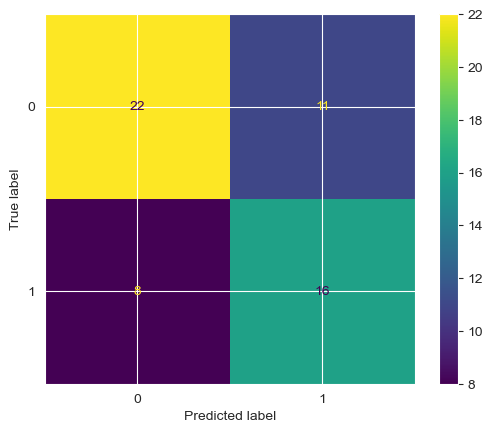

In [19]:
#(HDF_PM_LD)-Y PLS
#split data
HDF_train, HDF_test, Y_train, Y_test = train_test_split(HDF, Y, test_size=0.2, random_state=42)
BM_train = BM.loc[HDF_train.index]
BM_test = BM.loc[HDF_test.index]

LD_train = LD.loc[HDF_train.index]
LD_test = LD.loc[HDF_test.index]

PM_train = PM.loc[HDF_train.index]
PM_test = PM.loc[HDF_test.index]

mamsipls = MamsiPls(n_components=1)
mamsipls.fit([HDF_train, PM_train, LD_train], Y_train)
# predict
y_pred = mamsipls.evaluate_class_model([HDF_test, PM_test, LD_test], Y_test)

auc reaches bent (increase of less than 5.0 % of previous value or decrease) at component 2
auc reaches plateau at component 5
Model re-fitted with n_components = 5


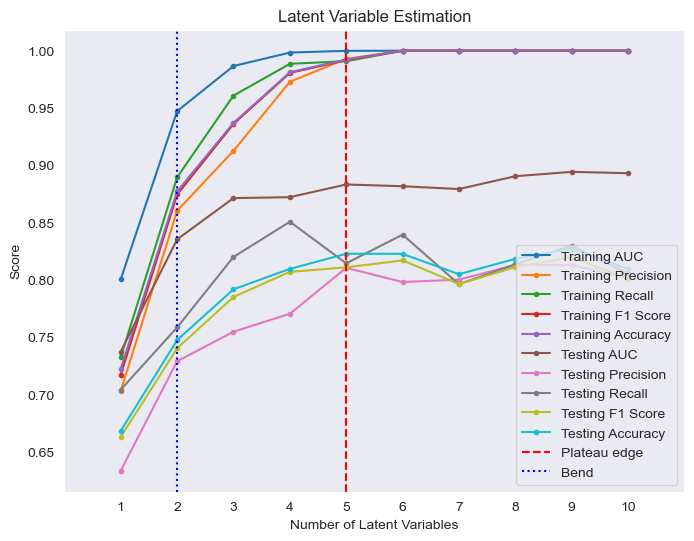

In [20]:
mamsipls.estimate_lv([HDF_train, PM_train,LD_train], Y_train, metric="auc")

In [21]:
print(mamsipls.n_components)

5


Scores for model with n_components = 5

Accuracy 0.789
Precision 0.731
Recall 0.792
Specificity 0.788
F1 Score 0.76
AUC 0.871


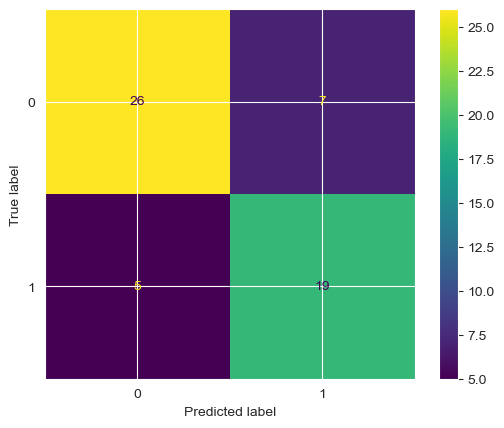

In [22]:
y_pred = mamsipls.evaluate_class_model([HDF_test, PM_test, LD_test], Y_test)